In [ ]:
import numpy as np

# Define problem parameters
nx, ny = 50, 50  # Number of grid points in x and y directions
Lx, Ly = 1.0, 1.0  # Domain size
dx, dy = Lx / (nx - 1), Ly / (ny - 1)  # Grid spacing

# Create a grid
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)

# Initialize solution and RHS
u = np.zeros((nx, ny) )  # Initial guess for u
f = np.ones((nx, ny))  # Right-hand side function (you can define your own)

# Define convergence criteria
max_iterations = 1000
tolerance = 1e-6

# Jacobi Iteration
def jacobi_iteration(u, f, dx, dy):
    nx, ny = u.shape
    u_new = np.copy(u)
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - dx**2 * f[i, j])
    return u_new

# Gauss-Seidel Iteration
def gauss_seidel_iteration(u, f, dx, dy):
    nx, ny = u.shape
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - dx**2 * f[i, j])
    return u

# Perform iterations until convergence
for iteration in range(max_iterations):
    u_prev = np.copy(u)
    u = jacobi_iteration(u, f, dx, dy)  # Use Gauss-Seidel for Gauss-Seidel iteration
    max_diff = np.max(np.abs(u - u_prev))
    if max_diff < tolerance:
        print(f"Converged after {iteration+1} iterations.")
        break

# Print or visualize the solution (u) as needed


Converged after 2494 iterations.


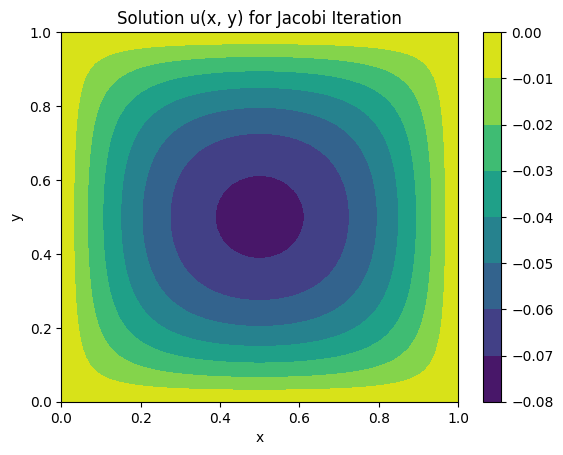

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
nx, ny = 50, 50  # Number of grid points in x and y directions
Lx, Ly = 1.0, 1.0  # Domain size
dx, dy = Lx / (nx - 1), Ly / (ny - 1)  # Grid spacing

# Create a grid
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Initialize solution and RHS
u = np.zeros((nx, ny))  # Initial guess for u
f = np.ones((nx, ny))  # Right-hand side function (you can define your own)

# Define convergence criteria
max_iterations = 5000
tolerance = 1e-6

# Create a figure for visualization
plt.figure()

# Jacobi Iteration
def jacobi_iteration(u, f, dx, dy):
    nx, ny = u.shape
    u_new = np.copy(u)
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1] - dx**2 * f[i, j])
    return u_new

# Perform iterations until convergence
for iteration in range(max_iterations):
    u_prev = np.copy(u)
    u = jacobi_iteration(u, f, dx, dy)
    max_diff = np.max(np.abs(u - u_prev))
    if max_diff < tolerance:
        print(f"Converged after {iteration+1} iterations.")
        break

# Plot the solution
plt.contourf(X, Y, u, cmap='viridis')
plt.colorbar()
plt.title("Solution u(x, y) for Jacobi Iteration")
plt.xlabel("x")
plt.ylabel("y")

# Show the plot
plt.show()


Jacobi: Converged after 6489 iterations.


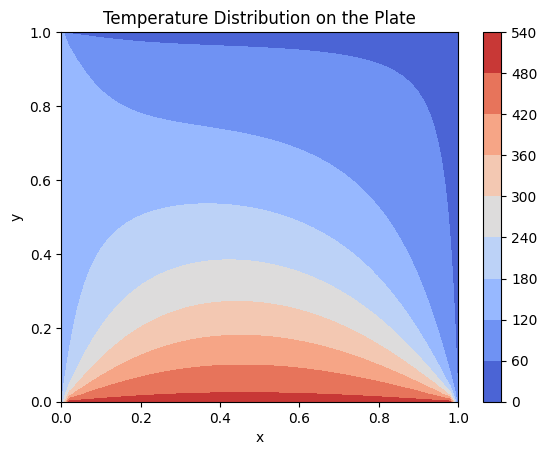

Gauss-Seidel: Converged after 3409 iterations.


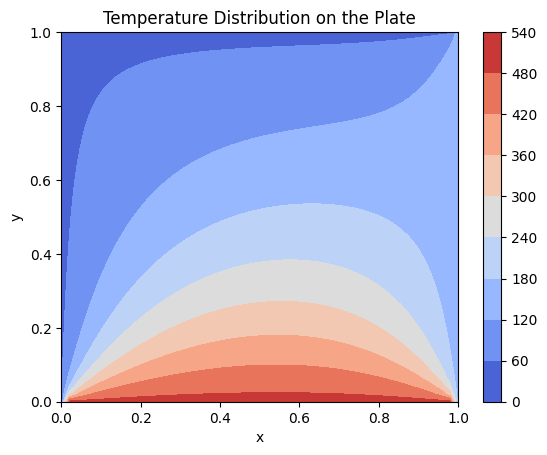

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define problem parameters
Lx, Ly = 1.0, 1.0  # Plate dimensions
Nx, Ny = 50, 50  # Number of grid points in x and y directions
dx, dy = Lx / (Nx - 1), Ly / (Ny - 1)  # Grid spacing

# Create a grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)

# Initialize temperature field and heat source
T = np.zeros((Nx, Ny))  # Temperature
Q = np.zeros((Nx, Ny))  # Heat source (you can define your own)

# Define boundary conditions (homogeneous Dirichlet)
T[0, :] = 500 # Heat applied at bottoom
T[-1, :] = 50  # Top
T[:, 0] = 150  # Left
T[:, -1] = 50  # Right

# Define convergence criteria
max_iterations = 10000
tolerance = 1e-6

# Jacobi Iteration
def jacobi_iteration(T, Q, dx, dy):
    Nx, Ny = T.shape
    T_new = np.copy(T)
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            T_new[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1] - dx**2 * Q[i, j])
    return T_new

# Gauss-Seidel Iteration
def gauss_seidel_iteration(T, Q, dx, dy):
    Nx, Ny = T.shape
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            T[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1] - dx**2 * Q[i, j])
    return T

# Perform iterations until convergence (Jacobi method)
for iteration in range(max_iterations):
    T_prev = np.copy(T)
    T = jacobi_iteration(T, Q, dx, dy)
    max_diff = np.max(np.abs(T - T_prev))
    if max_diff < tolerance:
        print(f"Jacobi: Converged after {iteration+1} iterations.")
        break

# Visualize the temperature distribution
plt.contourf(x, y, T, cmap='coolwarm')
plt.colorbar()
plt.title("Temperature Distribution on the Plate")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Reset T to zeros for Gauss-Seidel method
T = np.zeros((Nx, Ny))
T[0, :] = 500 # Heat applied at bottoom
T[-1, :] = 50  # Top
T[:, 0] = 50  # Left
T[:, -1] = 150  # Right

# Perform iterations until convergence (Gauss-Seidel method)
for iteration in range(max_iterations):
    T_prev = np.copy(T)
    T = gauss_seidel_iteration(T, Q, dx, dy)
    max_diff = np.max(np.abs(T - T_prev))
    if max_diff < tolerance:
        print(f"Gauss-Seidel: Converged after {iteration+1} iterations.")
        break

# Visualize the temperature distribution
plt.contourf(x, y, T, cmap='coolwarm')
plt.colorbar()
plt.title("Temperature Distribution on the Plate")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
